<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/Tarea_3_Caso_Empresarial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of the Physicochemical Properties of Protein Tertiary Structure 
----------------------

## Context

Protein tertiary structure prediction is a field of research aimed at creating models and computational tools capable of predicting the three-dimensional shape of protein molecules by describing the spatial arrangement of each of their atoms from the sequence of their amino acids.

Proteins play an important role in the maintenance of life. The study of the tertiary structure of proteins contributes to their function and is also used for drug design and drug discovery.
The physicochemical properties of amino acids and their solvent environment are the determining factors in the folding of a protein sequence into its unique tertiary structure.

A common study technique for the prediction of tertiary structures of unknown proteins is to extrapolate them according to their groups and properties, so that a protein with similar characteristics that has not been studied is very likely to have a similar structure to the protein family whose properties are similar.


## Objetive


- Predict the protein tertiary structure based on its physicochemical property(Total_Surface)



---------------------

This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong.

- Data Set Characteristics: Multivariate

- Number of Instances:45730

- Area:Life

- Attribute Characteristics:Real

- Number of Attributes:9

- Date Donated:2013-03-31

- Associated Tasks:Regression

- Missing Values?:N/A


---

[Physicochemical Properties of Protein Tertiary Structure Data Set](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure#)



-------------------
- Name :Juan Felipe Cardona Arango
- id: 1035428859
- Course: Electiva I: Aprendizaje de Máquina
- Asesor: Sebastian 
- Date: 10/05/2023

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn
import datetime as dt
from sklearn import metrics

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


We can load the "CASP.csv" file with pandas and store in a dataframe:

In [2]:
df=pd.read_csv("/content/CASP.csv")

### Attribute Information:

- RMSD-Size of the residue.
- F1 - Total surface area.
- F2 - Non polar exposed area.
- F3 - Fractional area of exposed non polar residue.
- F4 - Fractional area of exposed non polar part of residue.
- F5 - Molecular mass weighted exposed area.
- F6 - Average deviation from standard exposed area of residue.
- F7 - Euclidian distance.
- F8 - Secondary structure penalty.
- F9 - Spacial Distribution constraints (N,K Value)

----------------

These attributes are structural features of proteins that are commonly used in the prediction of protein stability and the stability of protein-protein interactions.

- RMSD (Root Mean Square Deviation): A measure of the deviation of the atomic positions of a protein from its reference structure. The size of the residue refers to the size of the amino acids that make up the protein.

- F1 (Total surface area): The total amount of exposed surface area of a protein.

- F2 (Non-polar exposed area): It is the amount of exposed area corresponding to the non-polar groups of the protein.

- F3 (Fraction of non-polar exposed area): It is the fraction of exposed surface area corresponding to the non-polar groups of the protein.

- F4 (Non-polar exposed area fraction of the protein): The fraction of the total surface area that corresponds to the non-polar groups of the protein.

- F5 (Area weighted by the exposed molecular mass): It is the product of the exposed surface area of a residue and the molecular mass of the residue.

- F6 (Average deviation of the standard exposed area of the residue): It is the average deviation of the exposed surface area of a residue from a standard value.

- F7 (Euclidean distance): A measure of the distance in three-dimensional space between two points.

- F8 (Secondary structure penalty): This is a penalty applied to residues that are in specific secondary structures, as they have been shown to have a lower surface exposure.

- F9 (Spatial distribution constraints (N,K value)): These are constraints that apply to the spatial distribution of residues in a protein, based on the distribution of similar residues in proteins of known structures. The N-value indicates the number of nearby residues taken into account and K indicates the number of amino acid types taken into account.

# Exploratory Data Analysis and pre-prosessing

In [3]:
colnames=df.columns.values
print(colnames)

['RMSD' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9']


In [4]:

type(df)

pandas.core.frame.DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [6]:
df.shape

(45730, 10)

In [7]:
titulos=["Size","Total_Surface","Exposed_area","FAEPR","FAENPR","MMEA","ASDT","ED","SP","SDC"]
df.columns=titulos
df.head()

Size  Total_Surface  Exposed_area    FAEPR    FAENPR          MMEA  \
0  17.284       13558.30       4305.35  0.31754  162.1730  1.872791e+06   
1   6.021        6191.96       1623.16  0.26213   53.3894  8.034467e+05   
2   9.275        7725.98       1726.28  0.22343   67.2887  1.075648e+06   
3  15.851        8424.58       2368.25  0.28111   67.8325  1.210472e+06   
4   7.962        7460.84       1736.94  0.23280   52.4123  1.021020e+06   

       ASDT       ED   SP      SDC  
0  215.3590  4287.87  102  27.0302  
1   87.2024  3328.91   39  38.5468  
2   81.7913  2981.04   29  38.8119  
3  109.4390  3248.22   70  39.0651  
4   94.5234  2814.42   41  39.9147

In [8]:
df.describe()

Size  Total_Surface  Exposed_area         FAEPR        FAENPR  \
count  45730.000000   45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528    9871.596995   3017.367175      0.302392    103.492433   
std        6.118312    4058.138034   1464.324663      0.062886     55.424985   
min        0.000000    2392.050000    403.500000      0.092500     10.310100   
25%        2.305000    6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000    8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000   12126.150000   3786.410000      0.342890    133.646750   
max       20.999000   40034.900000  15312.000000      0.577690    369.317000   

               MMEA          ASDT             ED            SP           SDC  
count  4.573000e+04  45730.000000   45730.000000  45730.000000  45730.000000  
mean   1.368299e+06    145.638061    3989.755990     69.975071     34.523664  
std    5.640367e+05     69.999230    1993.574575     56.493443      5.979755  
min    3.194902e+05     31.970400       0.000000      0.000000     15.228000  
25%    9.535912e+05     94.757500    3165.322500     31.000000     30.424725  
50%    1.237219e+06    126.176000    3840.170000     54.000000     35.299300  
75%    1.690920e+06    181.468500    4644.192500     91.000000     38.870800  
max    5.472011e+06    598.408000  105948.170000    350.000000     55.300900

We see that the isnull() function did not find null values within the dataframe and neither np.nan was found.

In [9]:
df.isnull().sum()

Size             0
Total_Surface    0
Exposed_area     0
FAEPR            0
FAENPR           0
MMEA             0
ASDT             0
ED               0
SP               0
SDC              0
dtype: int64

Therefore, the handling of missing data such as Imputer() is not necessary for this data set.

### Observations

In this dataframe, there was no need to impute data, no missing or null data were entered, no change from qualitative to quantitative data was necessary, since all the attributes are measurements of the crystalline structure of the Proteins.

in conclussion

- no processing of missing data 
- no data imputation necessary
- no transformation of categorical data to be performed
- in this case the data has not yet been normalized, so an initial approximation is made with the sperman correlation.


## Univariate Analysis

Now, I will explore each variable in a data set, separately, it is intended:

* Examine the range of values, as well as the central tendency of the values. 
* Describe the pattern of responses to the variable. 
* Describe each variable separately. 

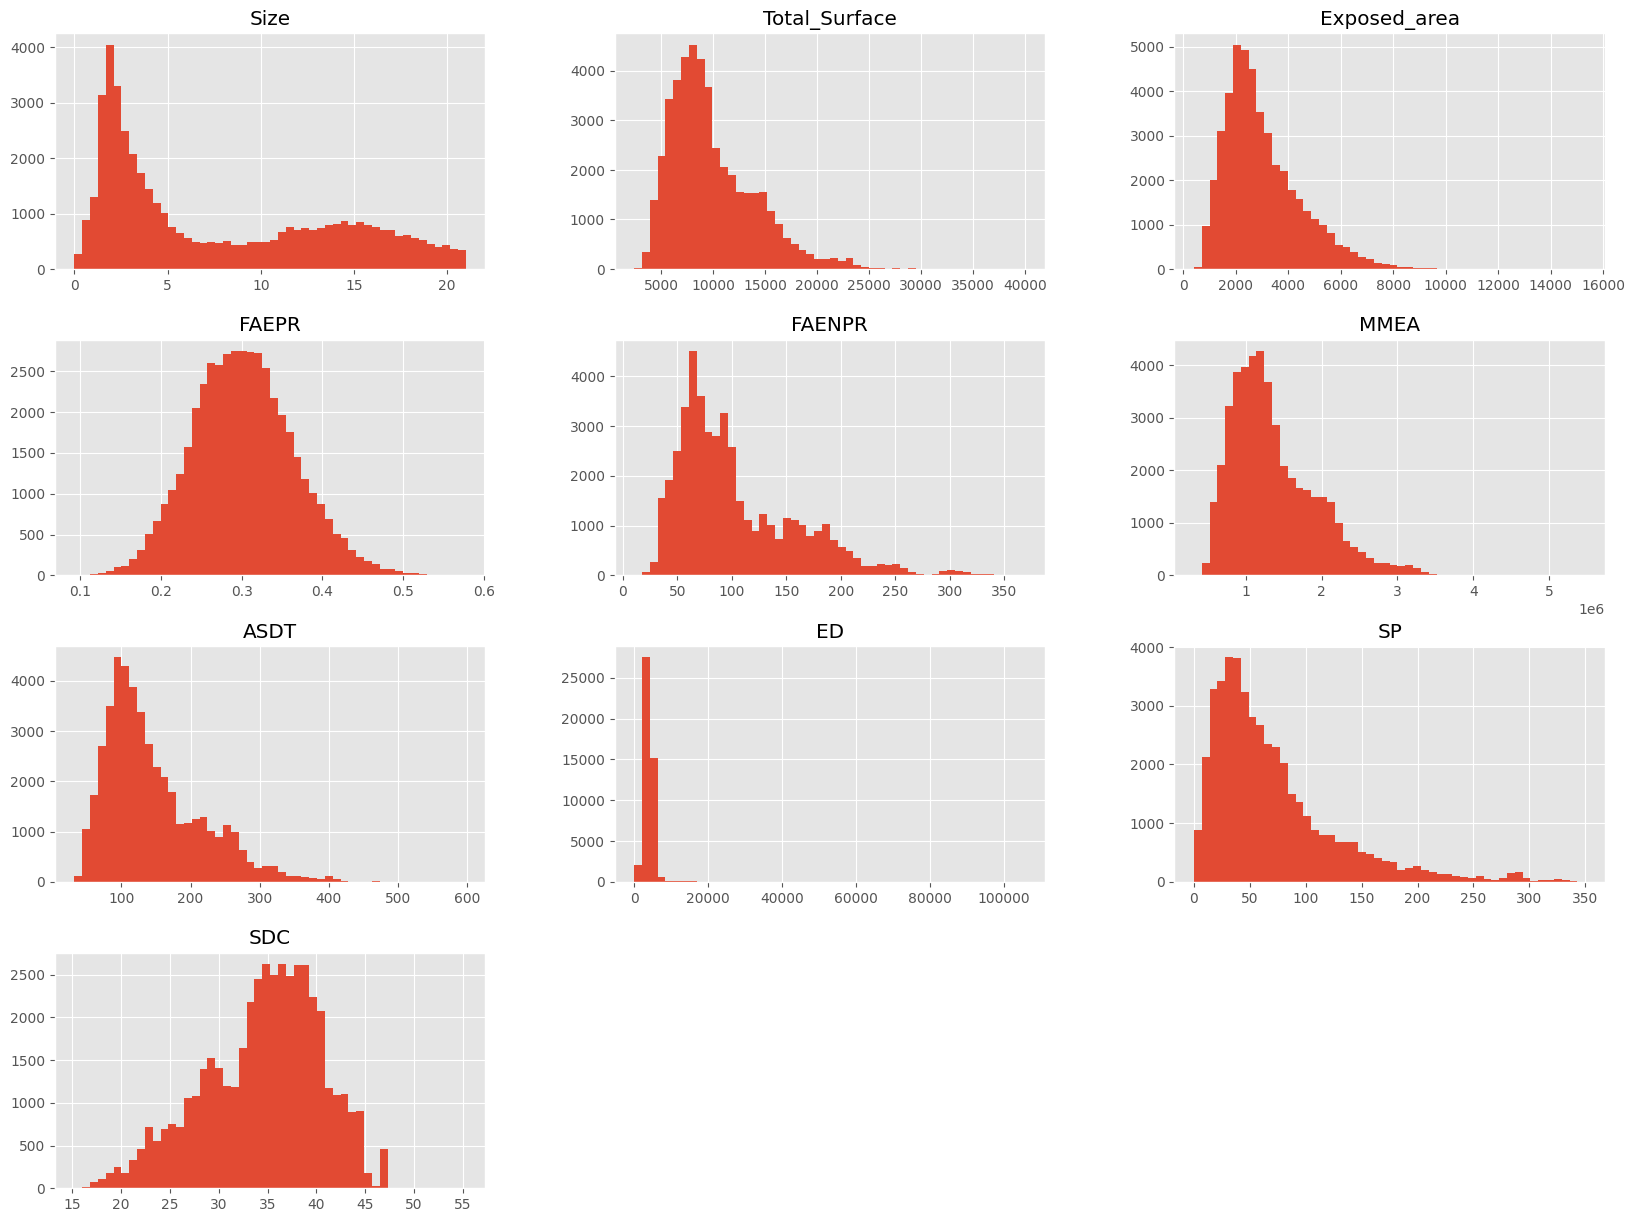

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Observation

he probability distribution is a fundamental tool for foresight, since it makes it possible to design a scenario of future events by considering the current trends of various phenomena.

By observing the distribution of the data for each variable, the following types can be observed 



*   Asymmetric
*   Gaussian(FAEPR)



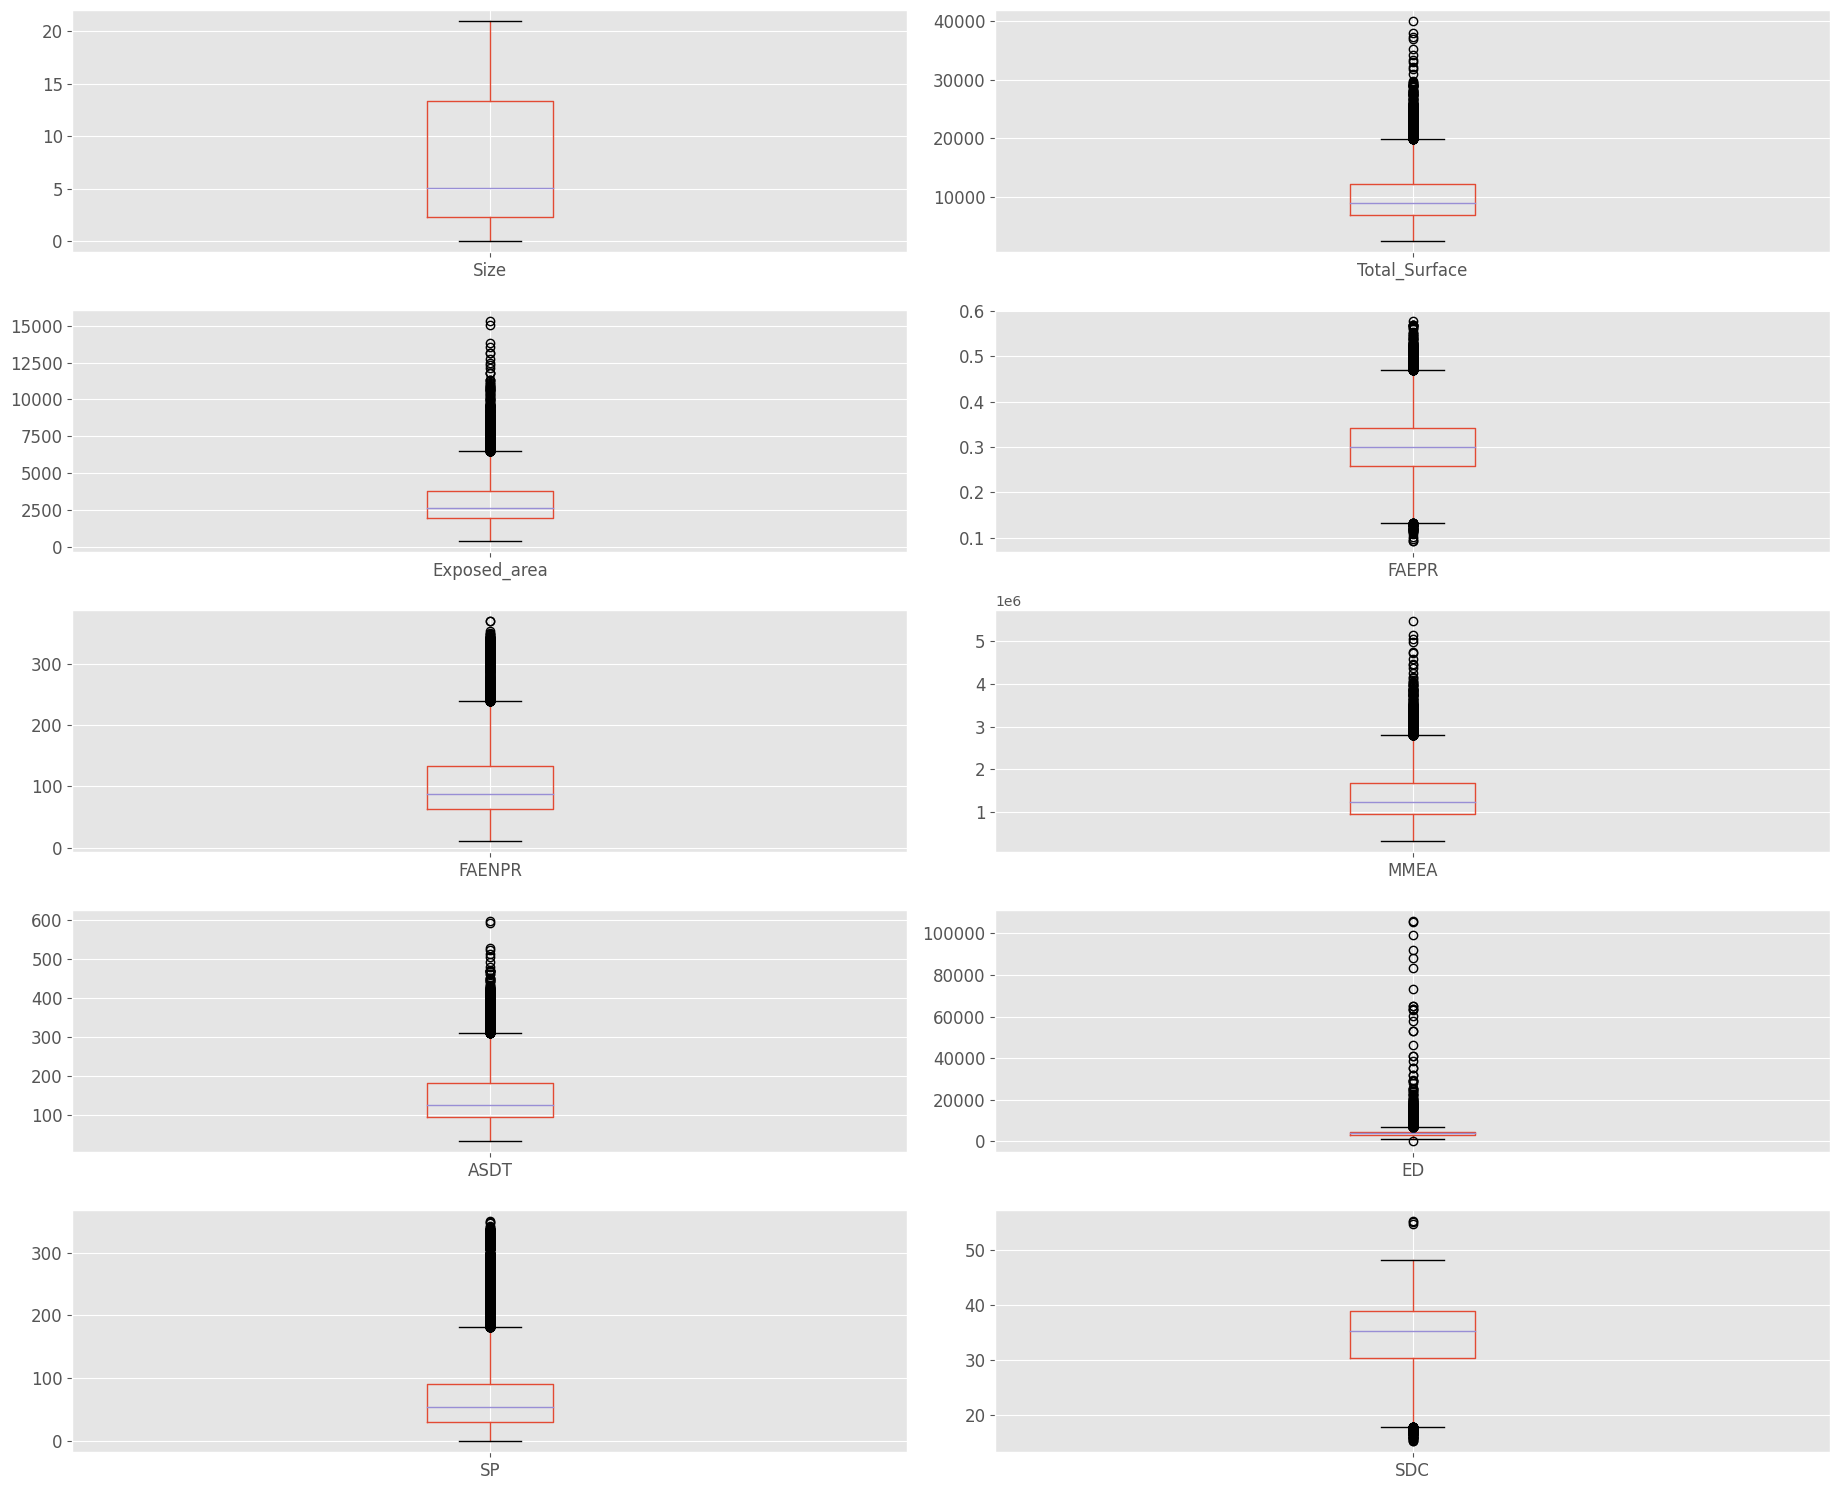

In [11]:
fig, axes = plt.subplots(5,2) # create figure and axes

for i, el in enumerate(list(df[titulos].columns.values)):
  a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 15)
plt.tight_layout() 

plt.show()

### Observations

The Box  Plot shows us a summary of a large amount of data in five descriptive measures, in addition to intuiting its morphology and symmetry.

In most cases outliers are those points that are beyond the lower or upper limit.

## Correlations (Corr)

The extent to which two variables are linearly related (correlation) will now be explored.

The purpose of this exercise is to describe simple relationships without making statements about cause and effect and to observe the degree of intensity with which they are linked.


In [ ]:
df.corr(method='spearman')

Size  Total_Surface  Exposed_area     FAEPR    FAENPR  \
Size           1.000000      -0.009582      0.162299  0.389039 -0.145833   
Total_Surface -0.009582       1.000000      0.893122  0.131872  0.937524   
Exposed_area   0.162299       0.893122      1.000000  0.535850  0.806998   
FAEPR          0.389039       0.131872      0.535850  1.000000  0.050070   
FAENPR        -0.145833       0.937524      0.806998  0.050070  1.000000   
MMEA          -0.012447       0.997821      0.889149  0.127898  0.933307   
ASDT          -0.023139       0.964447      0.911434  0.226711  0.932820   
ED            -0.028618       0.919873      0.816426  0.111367  0.870806   
SP             0.076449       0.596608      0.574048  0.144056  0.593563   
SDC            0.062095      -0.919616     -0.799502 -0.070620 -0.908975   

                   MMEA      ASDT        ED        SP       SDC  
Size          -0.012447 -0.023139 -0.028618  0.076449  0.062095  
Total_Surface  0.997821  0.964447  0.919873  0.596608 -0.919616  
Exposed_area   0.889149  0.911434  0.816426  0.574048 -0.799502  
FAEPR          0.127898  0.226711  0.111367  0.144056 -0.070620  
FAENPR         0.933307  0.932820  0.870806  0.593563 -0.908975  
MMEA           1.000000  0.957067  0.917395  0.591815 -0.917966  
ASDT           0.957067  1.000000  0.891231  0.612989 -0.898222  
ED             0.917395  0.891231  1.000000  0.577699 -0.915577  
SP             0.591815  0.612989  0.577699  1.000000 -0.588234  
SDC           -0.917966 -0.898222 -0.915577 -0.588234  1.000000

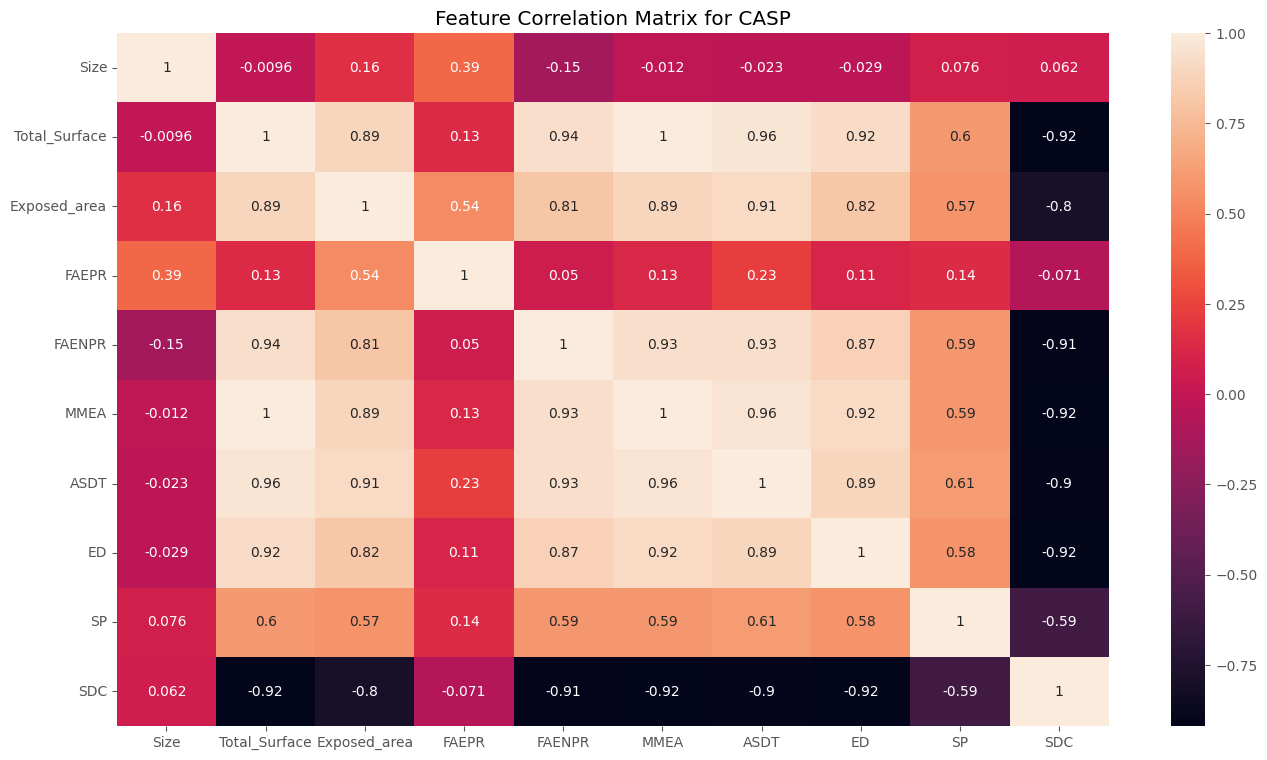

In [ ]:
sns.heatmap(df.corr(method='spearman'),annot=True )
plt.title('Feature Correlation Matrix for CASP')
plt.show()

The correlations between Total Surface and the other characteristics are shown below, where it can be seen that the characteristics with a higher degree of correlation is MME ,ASDT AND FAENPR , behavior that was to be expected after what was explained in the description

however, what we want to create, is a colored map that shows the strength of the correlation between every independent variable that we want to include in our model and the dependent variable.

The following code returns the correlation of all features with ‘Total_Surface’, a single, dependent variable, sorted by in a descending manner

In [ ]:
corr_matrix = df.corr(method="spearman")
corr_matrix["Total_Surface"].sort_values(ascending=False)

Total_Surface    1.000000
MMEA             0.997821
ASDT             0.964447
FAENPR           0.937524
ED               0.919873
Exposed_area     0.893122
SP               0.596608
FAEPR            0.131872
Size            -0.009582
SDC             -0.919616
Name: Total_Surface, dtype: float64

### Observations
The correlations between Total_Surface and the other characteristics are shown below, where it can be seen that the characteristics with a higher degree of correlation is ASDT , behavior that was to be expected after what was explained in the description


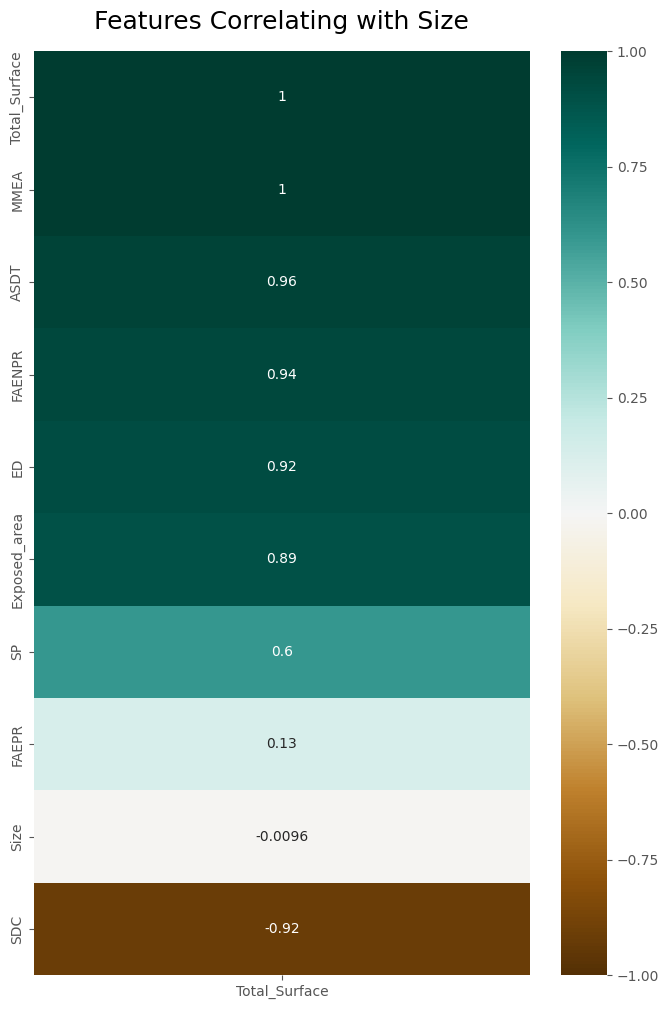

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method='spearman')[['Total_Surface']].sort_values(by='Total_Surface', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Size', fontdict={'fontsize':18}, pad=16);

<Axes: xlabel='Total_Surface', ylabel='ASDT'>

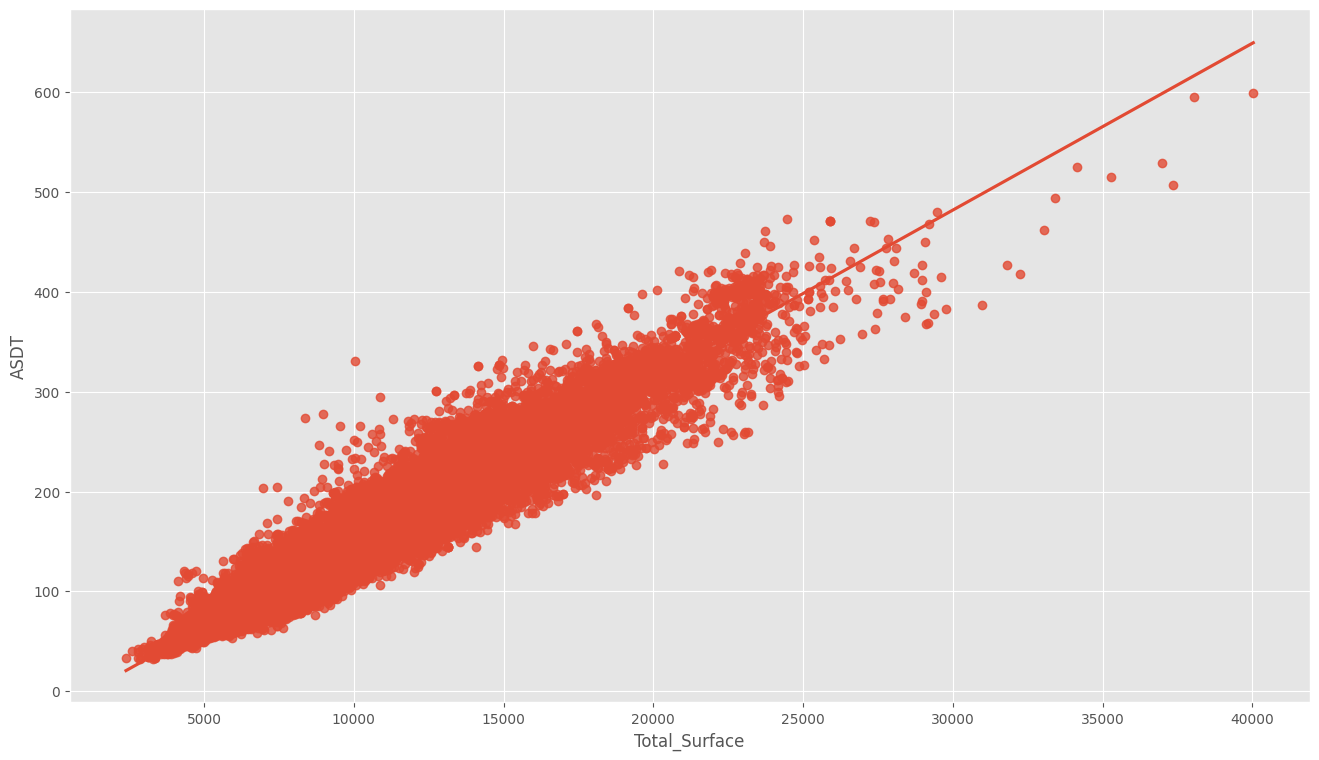

In [ ]:
sns.regplot(data=df,x="Total_Surface",y="ASDT")

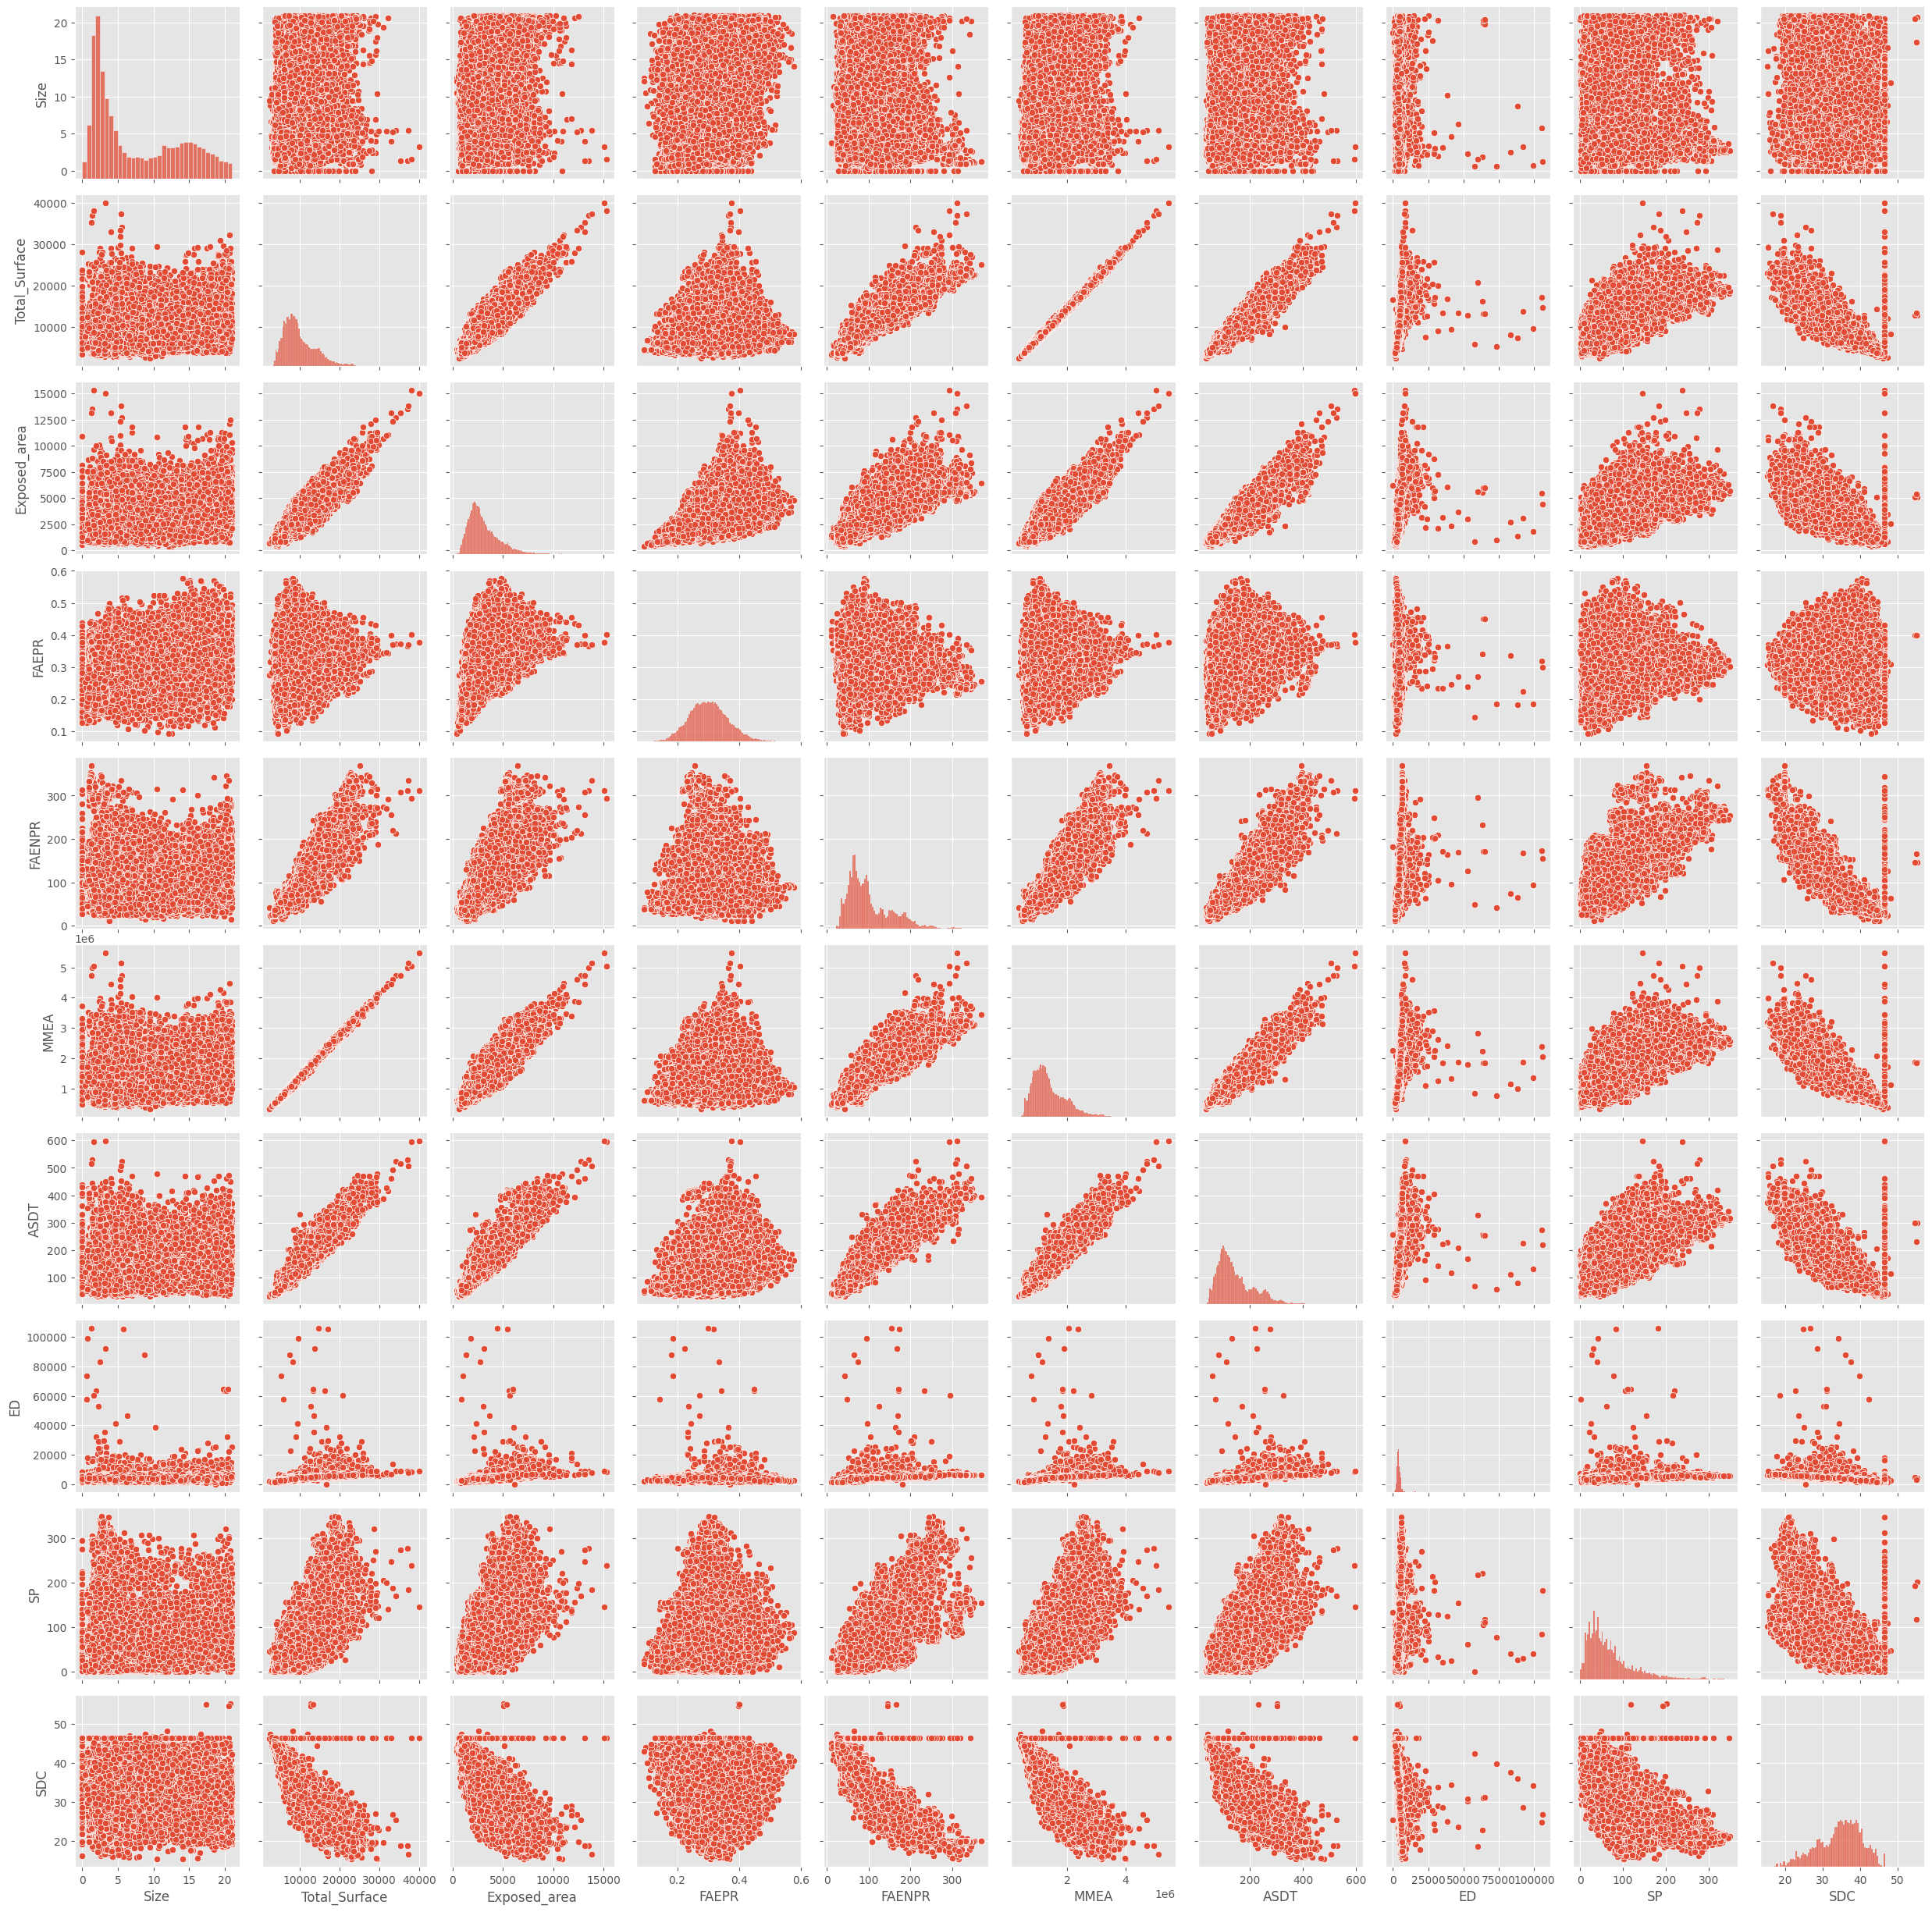

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

## ClarificationS about "EA2. Preprocesamiento de información"

In case the tutor wishes to validate the application of the imputation and data transformation process, given that the present data set does not require the above process, a previous activity where this procedure was performed is shared.

[Job-Satisfaction-Prediction-with-ML EDA](https://github.com/Vagarh/Job-Satisfaction-Prediction-with-ML/blob/main/EDA_exploracion_y_limpieza_de_datos.ipynb)

The variable to be monitored was changed since initially "Size" had been selected, however, when performing the exploitation analysis, weak correlations were found to establish a criterion to use regressions or groupings.

# Development of 5 Machine Learning Model  


For the development of the machine learning model two strategies will be used

the first one using pycaret 
and the second using the skilearn package

About PyCaret

PyCaret is an open source, low-code Python machine learning library that automates machine learning workflows. It is a comprehensive machine learning and model management tool that exponentially speeds up the experimentation cycle.

Compared to other open source machine learning libraries, PyCaret is a low-code alternative library that can be used to replace hundreds of lines of code with a few lines. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, Optuna, Hyperopt, Ray, and a few more.

Pros (PyCaret)

*  Facilitates the implementation of several analytics with one line of code

*  Optimizes time spent adjusting parameters. pycaret runs it automatically

* . Several options to evaluate the model



Cons(PyCaret)

* Black box operation, does not expose what is going on in the execution.
* Could make the learning process superficial

For more information about the library https://github.com/pycaret/pycaret



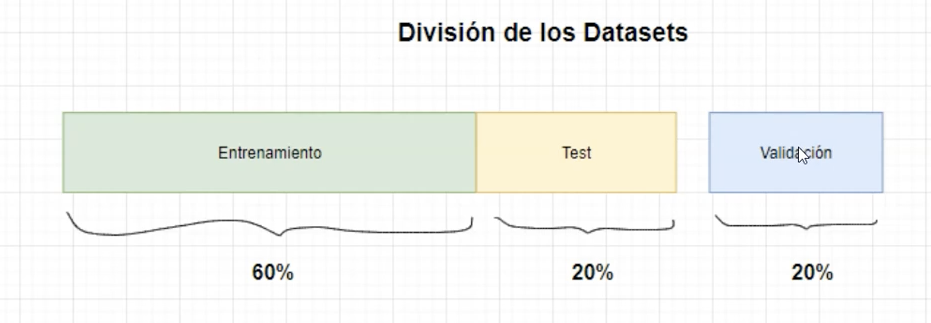


The datset is subdivided into three additional sets as shown in the graph above

- Training data set, which will contain 60% of the records.
- Test data set which will have 20% of the records.

These two will be used in the Ml process.

- Validation data set 20% for once the model is ready to test it with a set of data that it has not seen.

In [138]:
df.dtypes

Size             float64
Total_Surface    float64
Exposed_area     float64
FAEPR            float64
FAENPR           float64
MMEA             float64
ASDT             float64
ED               float64
SP                 int64
SDC              float64
dtype: object

“data“ contain de data that will be use to create the train and test data sets , the rest 20% of the original data will be use to validations

In [139]:

data=df.sample(frac=0.80, random_state=786 )

In [140]:
data.shape


(36584, 10)

In [141]:
df.shape

(45730, 10)

In [142]:
data.head()

Size  Total_Surface  Exposed_area    FAEPR    FAENPR          MMEA  \
257     4.786        8224.38       2547.01  0.30969   90.0116  1.112973e+06   
42973  15.230       12386.10       3714.80  0.29991  107.0770  1.711783e+06   
44925   2.288        9927.02       2793.26  0.28137   99.5407  1.357404e+06   
29087  11.558        9830.83       2411.26  0.24527  105.9720  1.332364e+06   
24798   4.005       18461.80       5541.57  0.30016  251.8660  2.508488e+06   

          ASDT       ED   SP      SDC  
257    117.026  4274.11  103  33.3403  
42973  157.517  4936.32   94  30.9668  
44925  149.450  4125.00  119  33.1625  
29087  112.790  4355.84   40  33.6904  
24798  260.501  4949.17  262  26.7393

## 1-ML Using Pycaret


### Setup

In [135]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-xwwsf_6o
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-xwwsf_6o
  Resolved https://github.com/pycaret/pycaret.git to commit e866eea4539f63ff51a9dd76569cae948400d372
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.5 MB/s eta 0:00:00
  Installin

In [143]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.0.2'

PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups. 

It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 10 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:
 **Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [144]:
from pycaret.regression import*
s=setup(data,target="Total_Surface", session_id=123)


### Compare Models
This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [145]:
best=compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Create Model
This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the get_metrics function. Custom metrics can be added or removed using the add_metric and remove_metric function. All the available models can be accessed using the models function.

In [146]:
print(best)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)


### Evaluated Model

In [147]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Observations



### Predictions
This function generates cluster labels using a trained model on the new/unseen dataset.

In [148]:
predict_model(best)

Size  Exposed_area    FAEPR      FAENPR          MMEA        ASDT  \
38598  13.934000   2642.750000  0.43603   54.540298  8.408298e+05  105.296997   
16283  14.628000   1775.560059  0.30739   53.356300  7.885305e+05   83.654999   
300     3.317000   3670.909912  0.32710  126.764000  1.541144e+06  164.488998   
1848   11.454000   1524.079956  0.23587   55.498901  9.065020e+05   86.750504   
7389    0.000000   3601.060059  0.36192   97.047203  1.372459e+06  136.014008   
...          ...           ...      ...         ...           ...         ...   
9573   18.551001   1474.579956  0.22712   54.025902  8.459632e+05   78.850998   
14905   5.038000   1454.280029  0.32519   34.550201  6.361788e+05   50.344501   
3614   12.087000   2460.870117  0.29819   92.641800  1.158622e+06  102.584999   
14092  10.829000   2392.790039  0.31911   88.633102  1.022673e+06   99.318901   
35385   3.111000   3281.060059  0.25683  131.345001  1.740228e+06  169.371002   

                ED   SP        SDC  Total_Surface  prediction_label  
38598  2626.350098   71  40.425701    6060.839844       6136.179199  
16283  2395.919922   45  41.754002    5776.100098       5702.148438  
300    4898.560059   70  29.051001   11222.299805      11128.755859  
1848   3156.639893    8  39.172901    6461.359863       6588.328125  
7389   5041.660156  117  30.070200    9949.709961       9878.940430  
...            ...  ...        ...            ...               ...  
9573   2840.439941   30  39.046902    6492.379883       6172.565918  
14905  1555.500000   40  42.763401    4471.959961       4537.198242  
3614   3585.330078   24  35.906101    8252.450195       8353.698242  
14092  3432.409912   26  33.759899    7498.109863       7507.118652  
35385  4069.270020  216  31.833799   12775.099609      12776.418945  

[10976 rows x 11 columns]

### Observations

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

A perfect (RMSE) value is 0.0, which means that all predictions exactly match the expected values. So the closer to 0.0 the better.

A perfect mean absolute error value(MAE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

A perfect mean squared error value (MSE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

In conclusion Extreme Gradient regression is a good model to predict the total_suface

## 2-Multiple Lineal Regression with Scikit-Learn

### Setup

In [80]:
#This was the first model used to try to predict the target variable Duration in policy.
#Multiple linear regression was used because we have multiple #independent variables in the data set that contribute to the dependent variable.
#independent variables that contribute to the dependent variable.
# We imported the following sklearn library to use the methods and functions of a linear model.
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [81]:
x =df[["MMEA","ASDT","FAENPR","ED","Exposed_area","SP","FAEPR","Size","SDC"]]
y=df['Total_Surface']
print(x.shape)
print(y.shape)
     

(45730, 9)
(45730,)


In [82]:
#I separate the training and test data to test the algorithms. A test data size of 20% is used.
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(36584, 9)
(9146, 9)
(36584,)
(9146,)


### Create Model

In [84]:
#El algoritmo a utilizar en este caso es la regresión múltiple y normalizo las variables
lr_multiple=linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train,Y_train)

LinearRegression()

In [85]:
#Se generan las Y predichas
Y_pred_multiple=lr_multiple.predict(X_test)
print('Valor de las pendientes e intersección o coeficientes de la regresión lineal multiple')
print(lr_multiple.coef_)
print(lr_multiple.intercept_)

Valor de las pendientes e intersección o coeficientes de la regresión lineal multiple
[ 5.70508406e-03  3.35610323e+00  2.94729031e+00  2.27784458e-03
  3.58731703e-01  4.73009068e-01 -3.26670143e+03  2.11886675e+00
  2.36054047e+00]
1036.6149753422942


### Evaluated Model

In [18]:
print('Precision del modelo')
print(lr_multiple.score(X_train,Y_train))
print('R2 =',lr_multiple.score(X_test,Y_test))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred_multiple))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred_multiple))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_multiple)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_pred_multiple))

Precision del modelo
0.9976634285233382
R2 = 0.9976172013096317

MAE:  148.30135162120803
MSE:  38848.05078988945
RMSE:  197.09908875966283
R2: 0.998


### Crossvalidation

In [86]:

#Se realiza cross validation con k=5 fold para tener diferentes estimaciones del modelo se observa que el resultados de las varias iteracion es similar la exactitud del mismo
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lr_multiple, X_train, Y_train, cv=10)
print(cv_results)

[0.99753683 0.99765754 0.99754962 0.99773269 0.99764829 0.99764608
 0.99754859 0.9976832  0.99769059 0.99787296]


### Prediction

In [87]:

#En el siguiente comando se generan e imprimen los datos reales vs los predichos por el modelo de regresión lineal múltiple
df1= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred_multiple, 'Diference': ((Y_test-Y_pred_multiple)/Y_test)})
df1['Diference'].sum()

-2.742193232764162

### Observations


There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

A perfect (RMSE) value is 0.0, which means that all predictions exactly match the expected values. So the closer to 0.0 the better.

A perfect mean absolute error value(MAE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

A perfect mean squared error value (MSE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

In conclusion Multiple Lineal regression is a good model to predict the total_suface

## 3-Decision Tree Regresor With Scikitlearn

### Setup

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {'max_depth': np.arange(1, 10)}
knn = DecisionTreeRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)
knn_cv.best_params_

{'max_depth': 9}

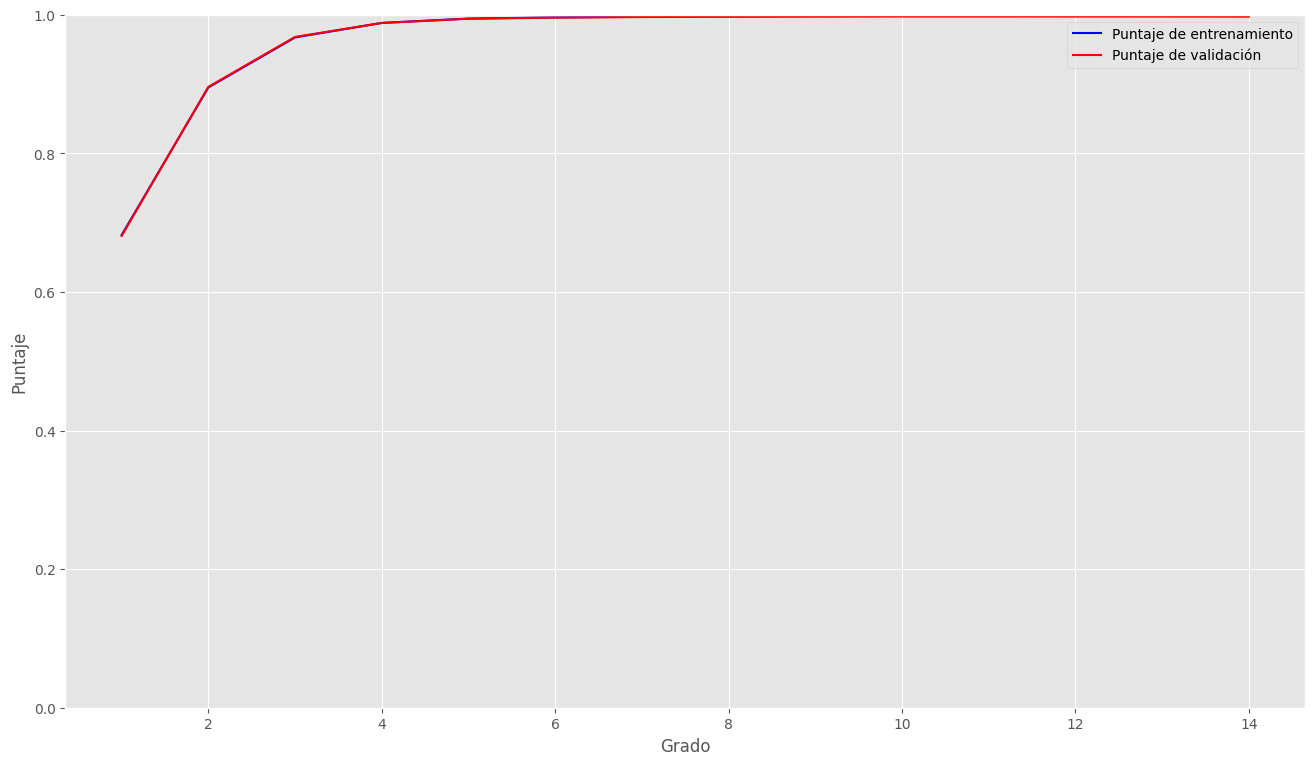

In [95]:
#Tambien se puede construir una curva usando validación cruzada la cual nos permite ver en que valor del
#hyperparámetro no se mejora significativamente el desempeño del modelo
from sklearn.model_selection import validation_curve
max_depth=np.arange(1, 15)
#train_score, val_score = validation_curve(DecisionTreeRegressor(), x, y,*,'max_depth', max_depth, cv=5)
train_score, val_score = validation_curve(DecisionTreeRegressor(), x, y,param_name = "max_depth", param_range = max_depth, cv=5)

plt.plot(max_depth, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(max_depth, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

### Create Model

In [96]:
#Se procede a construir el modelo usando el hiperparámetro max_depth = 11, siendo el resultado de la anterior corrida.
adr = DecisionTreeRegressor(max_depth=11)
adr.fit(X_train, Y_train)
Y_adr_pred=adr.predict(X_test)
print(Y_adr_pred)

[ 5969.8010101   7631.00570588  4403.35724138 ...  5505.43616071
  9404.79954545 12753.445     ]


### Evaluated Model

In [97]:
print('DATOS DEL MODELO ARBOLES DE DECISION REGRESIÓN')

print('Precisión del modelo:')
print(adr.score(X_train, Y_train))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_adr_pred))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_adr_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_adr_pred)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_adr_pred))

DATOS DEL MODELO ARBOLES DE DECISION REGRESIÓN
Precisión del modelo:
0.998633974443111

MAE:  144.66243233567894
MSE:  43667.04717122411
RMSE:  208.9666173608218
R2: 0.997


### CrossValidation

In [98]:
#Cross Validation para el modelo de Árboles de Decisión
cv_results = cross_val_score(adr, X_train, Y_train, cv=10)
print(cv_results)

[0.99728973 0.997231   0.99695736 0.99742041 0.99747161 0.9974423
 0.99719341 0.99736178 0.99689282 0.9975003 ]


### Prediction


In [99]:
df3= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_adr_pred, 'Diference': ((Y_test-Y_adr_pred)/Y_test)})
df3['Diference'].sum()

-3.232346666217031

### Observations
There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

A perfect (RMSE) value is 0.0, which means that all predictions exactly match the expected values. So the closer to 0.0 the better.

A perfect mean absolute error value(MAE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

A perfect mean squared error value (MSE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

In conclusion Decission Tree regressor is a good model to predict the total_suface

##  4-Lineal Regression with Scikitlearn

### Setup

In [128]:
#Este fue el primero modelo utilizado para intentar predecir la variable objetivo Duracion en la poliza
#Se utilizó la regresión lineal múltiple porque tenemos en el set de datos múltiples variables
#independientes que contribuyen a la variable dependiente.
#Importamos la siguiente librería de sklearn para utilizar los métodos y funciones de un modelo lineal.
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [118]:
x =df[["FAENPR"]]
y=df['Total_Surface']
print(x.shape)
print(y.shape)
     

(45730, 1)
(45730,)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [131]:
# Splitting the data into training and testing data
regr = LinearRegression()
 
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8675592508415428


### Exploring our results 

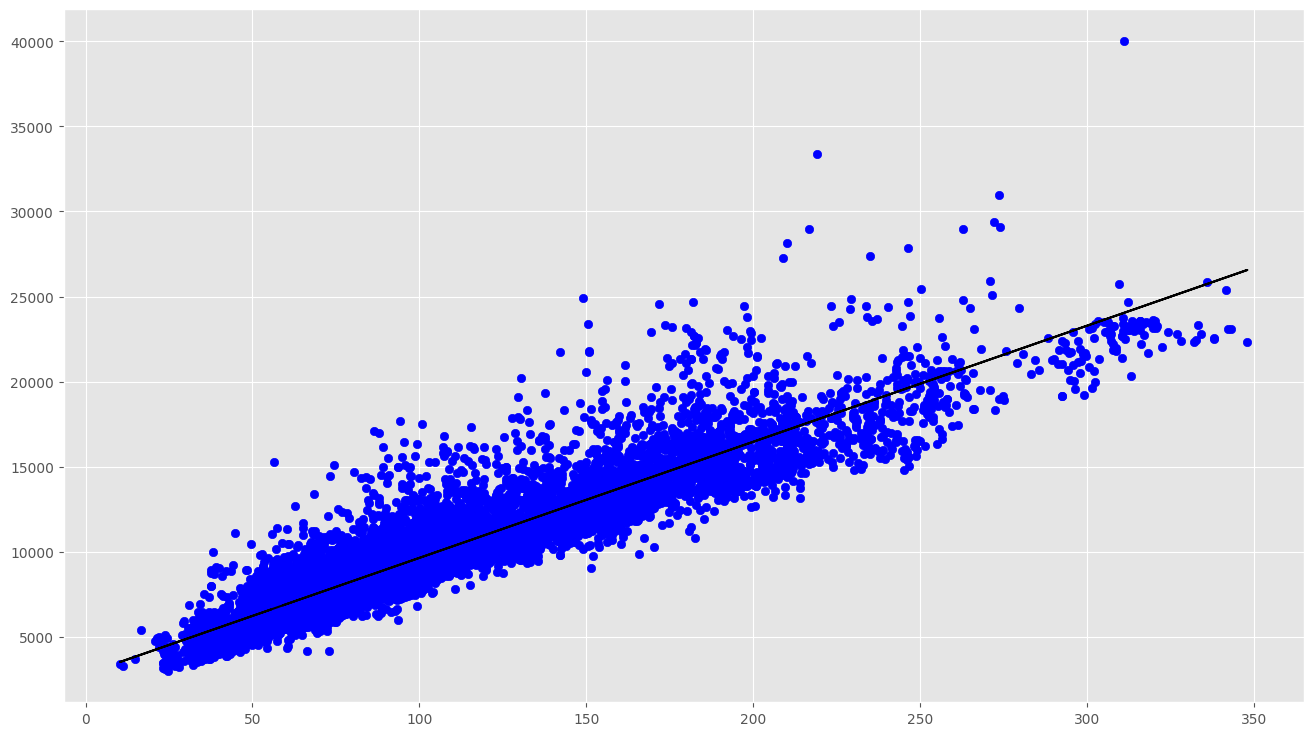

In [132]:

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values

La precision del modelo sugiere que el modelo tiene una alta relacion con los datos existente, esto sugiere que se factible predecir un dato a partir de los resultados del otro 

In [134]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1019.9172701881608
MSE: 2125288.4735602923
RMSE: 1457.8369159684125


## 5- Polinomial Regressor With Scikitlearn


### Setup

In [71]:
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

In [88]:
x =df[["MMEA","ASDT","FAENPR","ED","Exposed_area","SP","FAEPR","Size","SDC"]]
y=df['Total_Surface']
print(x.shape)
print(y.shape)
     

(45730, 9)
(45730,)


In [89]:
#I separate the training and test data to test the algorithms. A test data size of 20% is used.
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [74]:
#Se transforma las características existentes en características de mayor grado. En este caso un polinomio de grado 2
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

### Created Model

In [90]:
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, Y_train)


LinearRegression()

### Predict Model

In [76]:
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

### Evaluated Model

In [100]:
print('DATOS DE LA REGRESION POLINOMIAL')
print('Precisión del modelo:')
print(pr.score(X_train_poli, Y_train))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred_pr))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred_pr))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_pr)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_pred_pr))

DATOS DE LA REGRESION POLINOMIAL
Precisión del modelo:
0.9999134711009747

MAE:  24.995520826660304
MSE:  1527.4607811724968
RMSE:  39.08274275396363
R2: 1.000


### Crossvalidation

In [93]:
#Cross Validation para el modelo de Regresión Polinomial
cv_results = cross_val_score(pr, X_train_poli, Y_train, cv=10)
print(cv_results)

[0.99990293 0.99991157 0.99991235 0.99990247 0.99991125 0.99991559
 0.99990699 0.99991899 0.99991836 0.99991778]


In [94]:
df2= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred_pr, 'Diference': ((Y_test-Y_pred_pr)/Y_test)})
df2['Diference'].sum()

-0.43121311567897214

### Observations
There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

A perfect (RMSE) value is 0.0, which means that all predictions exactly match the expected values. So the closer to 0.0 the better.

A perfect mean absolute error value(MAE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

A perfect mean squared error value (MSE) is 0.0, which means that all predictions matched the expected values exactly.. So the closer to 0.0 the better

In conclusion Polinomial regression is a good model to predict the total_suface